In [1]:
import networkx as nx
#from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import pickle

pathToPickle = r"./GOTNetwork.pkl"
file = open(pathToPickle, "rb")
G = pickle.load(file)
Gundi = G.to_undirected()


In [26]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=100.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=False,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.01,
                        strongGravityMode=True,
                        gravity=0.1,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=8)


AttributeError: module 'networkx' has no attribute 'to_scipy_sparse_matrix'

In [2]:
for node, attribute in G.nodes(data=True):
    if "house" in attribute.keys() and attribute["house"][0] in ["House Baratheon of Dragonstone","House Baratheon of King's Landing"]:
        G.nodes(data=True)[node]["house"][0] = "House Baratheon"

In [3]:
def prePlot(Graph,charDegree):
    DegreeList = []
    labels = {}
    HOUSELIST = list()

    for (Character, attributes) in Graph.nodes(data=True):
        if "house" in attributes.keys():
            if attributes["house"] not in HOUSELIST:
                HOUSELIST.append(attributes["house"])
        if Graph.degree()[Character] > charDegree:
            labels[Character] = Character
        DegreeList.append(Graph.degree()[Character])

    return DegreeList, labels, HOUSELIST
    

In [95]:
def edgeWeights(Graph):
    edgeweights = list()
    colourList = list()
    for (FROM, TO, attributes) in Graph.edges(data=True):
        lineSum = 0
        for season,value in attributes["lines"].items():
            for episode, value2 in value.items():
                for episodename,value3 in value2.items():
                    for key, value4 in value3.items():
                        lineSum += len(value4)
        Graph[FROM][TO]["weight"] = lineSum
        edgeweights.append(lineSum/100)
    return edgeweights

In [5]:
def PlotGraph(Graph, Edges, charDegree = 50):
    DegreeList, labels, HOUSELIST = prePlot(Graph, charDegree)
    edgeweights = edgeWeights(Graph)
    nx.draw_networkx_nodes(Graph, positions, node_size=DegreeList, node_color="blue", alpha=0.4)
    nx.draw_networkx_edges(Edges, positions, edge_color="green", alpha=edgeweights)
    nx.draw_networkx_labels(Graph, positions, labels=labels, font_size=9)
    plt.axis('off')
    return

In [97]:
def PlotGrapWithComm(Graph, Edges, charDegree = 50):
    DegreeList, labels, HOUSELIST = prePlot(Graph, charDegree)
    edgeweights = edgeWeights(Graph)
    
    Graph = Graph.to_undirected()
    import community

    communities = community.best_partition(Graph)
    colourList = ["green","orange","blue","yellow", "purple", "grey", "brown","pink","olive", "tan", "aqua", "navy", "cyan","tomato", "lime", "dimgrey", "teal"]

    count = 0
    for com in set(communities.values()):
        list_nodes = [nodes for nodes in communities.keys() if communities[nodes] == com]
        DegreeList = []
        for nodes in list_nodes:
            DegreeList.append(G.out_degree[nodes]*2)
        nx.draw_networkx_nodes(Graph, positions, list_nodes, node_size = DegreeList, node_color = colourList[count], alpha = 0.5)
        count += 1 

    #nx.draw_networkx_nodes(Graph, positions, node_size=DegreeList, node_color="blue", alpha=0.4)
    nx.draw_networkx_edges(Edges, positions, edge_color="dimgrey", alpha=edgeweights)
    nx.draw_networkx_labels(Graph, positions, labels=labels, font_size=9)
    plt.axis('off')
    return

In [98]:
x = edgeWeights(G)

In [99]:
plt.figure(figsize= (20,20))
PlotGrapWithComm(G, G)

ModuleNotFoundError: No module named 'community'

<Figure size 2000x2000 with 0 Axes>

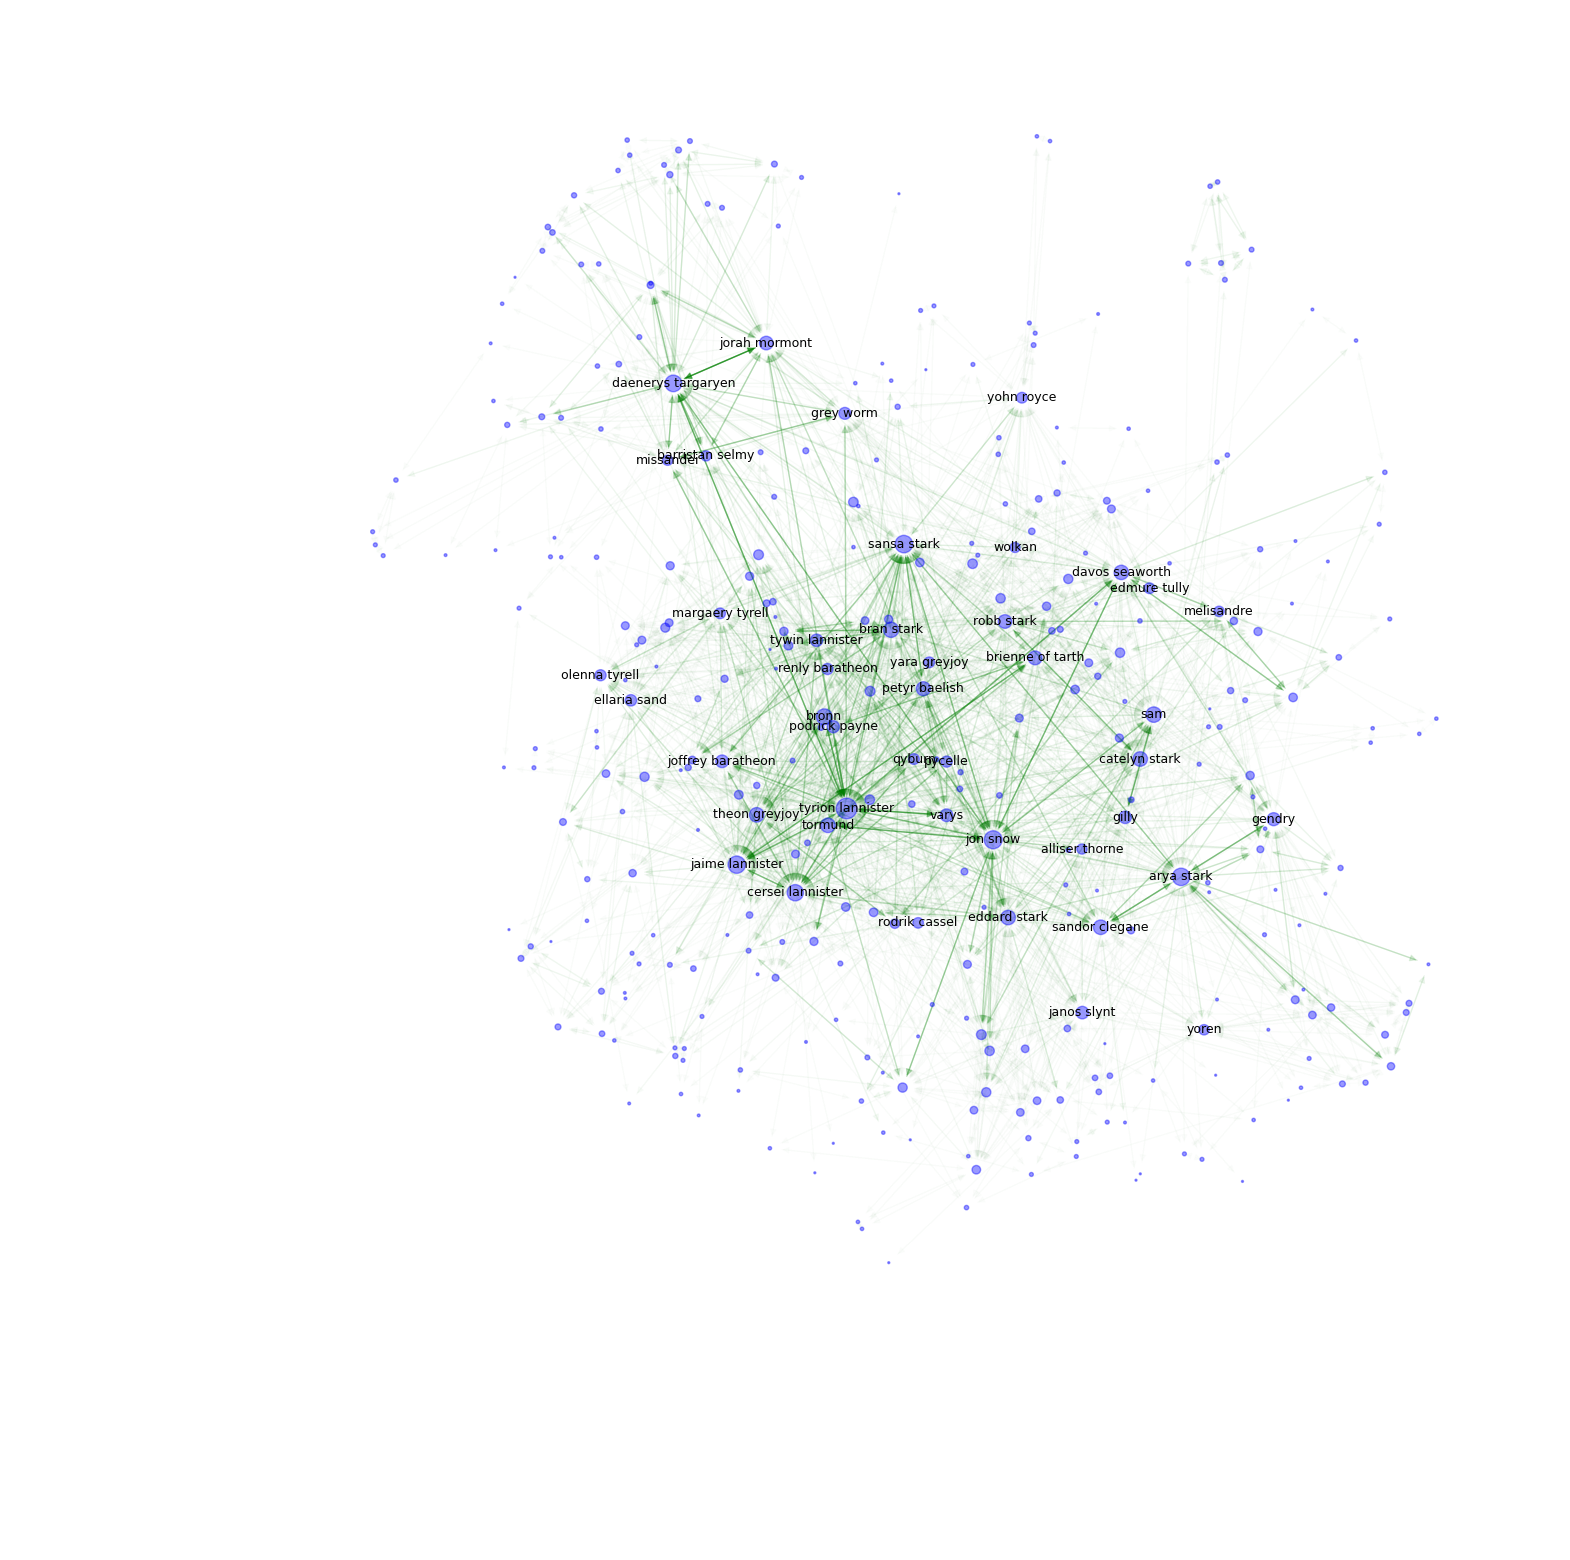

In [298]:
plt.figure(figsize= (20,20))
PlotGraph(G,G)
plt.show()

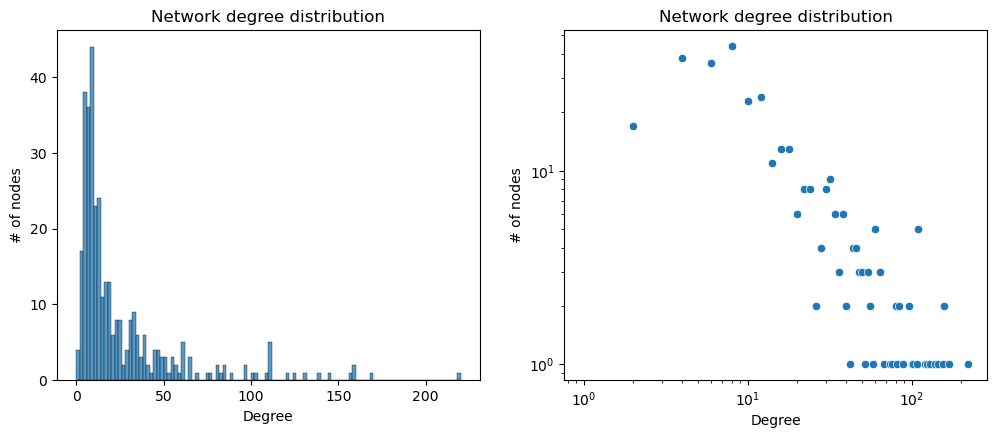

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
degree_sequence = sorted((d for n, d in G.degree()), reverse =True)

INbins = np.arange(min(degree_sequence), max(degree_sequence)+1)

pmf = [(degree_sequence == bin).sum() for bin in INbins]
pmf = np.array(pmf)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(degree_sequence,binwidth = 2)
plt.title("Network degree distribution")
plt.ylabel("# of nodes")
plt.xlabel("Degree")

plt.subplot(222)
sns.scatterplot(y = pmf, x = INbins)
plt.title("Network degree distribution")
plt.ylabel("# of nodes")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Degree")
plt.show()

In [102]:
import powerlaw
print(powerlaw.Fit(degree_sequence).alpha)


Calculating best minimal value for power law fit
2.6120461668304276


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [103]:
ppp=nx.all_pairs_dijkstra_path_length(G)
longestShortest = 0
for i in ppp:
  node=max(i[1], key=i[1].get)
  if len(nx.shortest_path(G,i[0],node)) > longestShortest:
    longestShortest = len(nx.shortest_path(G,i[0],node))

print(longestShortest)

5


In [104]:

TotalSorted = max(dict(G.degree()).items(), key = lambda x : x[1])
print("Most connected character is", TotalSorted[0].title(),"with a degree of", TotalSorted[1], "" )
MostConnected = sorted(dict(G.degree).items(), key = lambda x : x[1], reverse= True)
LeastConnected = sorted(dict(G.degree).items(), key = lambda x : x[1])
print("The 10 most connected characters:")
[print(str(i+1)+".",w[0],"with", w[1], "edges" ) for w,i in zip(MostConnected, range(0,10))]
print("-"*50)
print("The 10 least connected characters:")
[print(str(i+1)+".",w[0],"with", w[1], "edges" ) for w,i in zip(LeastConnected, range(0,10))]
x = 1

Most connected character is Tyrion Lannister with a degree of 220 
The 10 most connected characters:
1. tyrion lannister with 220 edges
2. jon snow with 168 edges
3. arya stark with 158 edges
4. sansa stark with 158 edges
5. jaime lannister with 156 edges
6. daenerys targaryen with 144 edges
7. cersei lannister with 138 edges
8. bronn with 130 edges
9. sam with 124 edges
10. bran stark with 120 edges
--------------------------------------------------
The 10 least connected characters:
1. father with 0 edges
2. white rat with 0 edges
3. rennick with 0 edges
4. harpy with 0 edges
5. night's watchman with 2 edges
6. harrag with 2 edges
7. maggy with 2 edges
8. drogo with 2 edges
9. martha with 2 edges
10. drowned priest with 2 edges


In [13]:

TotalSorted = max(dict(G.degree()).items(), key = lambda x : x[1])
print("Most connected character is", TotalSorted[0].title(),"with a degree of", TotalSorted[1], "" )
MostConnected = sorted(dict(G.degree).items(), key = lambda x : x[1], reverse= True)
LeastConnected = sorted(dict(G.degree).items(), key = lambda x : x[1])
print("The 10 most connected characters:")
[print(str(i+1)+".",w[0],"with", w[1], "edges" ) for w,i in zip(MostConnected, range(0,10))]

Most connected character is Tyrion Lannister with a degree of 220 
The 10 most connected characters:
1. tyrion lannister with 220 edges
2. jon snow with 168 edges
3. arya stark with 158 edges
4. sansa stark with 158 edges
5. jaime lannister with 156 edges
6. daenerys targaryen with 144 edges
7. cersei lannister with 138 edges
8. bronn with 130 edges
9. sam with 124 edges
10. bran stark with 120 edges


[None, None, None, None, None, None, None, None, None, None]

In [11]:
TyrionLines = 0

def line_numbers(name: str):
    TyrionLines = 0
    for x in G.edges(name):
        for key,val in G.edges()[x].items():
            for _, val2 in val.items():
                for _,val3 in val2.items():
                    for _,val4 in val3.items():
                        for _,val5 in val4.items():
                            TyrionLines += len(val5)
    return TyrionLines

TyrionLineNr = line_numbers("tyrion lannister")
JonSnowLineNr = line_numbers("jon snow")
AryaStarkLineNr = line_numbers("arya stark")
SansaStarkLineNr = line_numbers("sansa stark")
JamieLannisterLineNr = line_numbers("jaime lannister")
print(TyrionLineNr, JonSnowLineNr, AryaStarkLineNr,SansaStarkLineNr, JamieLannisterLineNr)


4739 3432 1640 1925 2015


In [15]:
import wordcloud
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords


In [27]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\s203557\AppData\Roaming\nltk_data...


True

In [26]:
TextList = ["" for i in range(8)]
TextSet = set()

for i in range(1,9):
    tmpText = ""
    for _,_,att in G.edges(data=True):
        if i in att["lines"].keys():
            for episodeNr, value in att["lines"][i].items():
                for episode, value2 in value.items():
                    for scene, lines in value2.items():
                        if "".join(lines).strip() not in TextSet:
                            TextSet.add("".join(lines).strip())
                            tmpText += "".join(lines).strip()
    TextList[i-1] = nltk.word_tokenize(tmpText)

FinalTextList = list()
wnl = nltk.WordNetLemmatizer()



In [28]:
for lists in TextList:
    tmpList = [wnl.lemmatize(x.lower()) for x in lists if re.match("\w", x) != None and x.lower() not in stopwords.words("english") and x.lower() not in ["n't","lt","lf","l","u"]]
    k = nltk.FreqDist(tmpList)
    FinalTextList.append(k)

In [29]:
tftrList = list()
FreqDict = dict()
c = 8
for i in range(8):
    FreqDict = dict()
    for word, count in FinalTextList[i].items():
        weight = 0
        for k in range(len(FinalTextList)):
            if k != i:
                weight += FinalTextList[k][word]
        FreqDict[word] = count/(1/7*weight+c)
    tftrList.append(FreqDict)


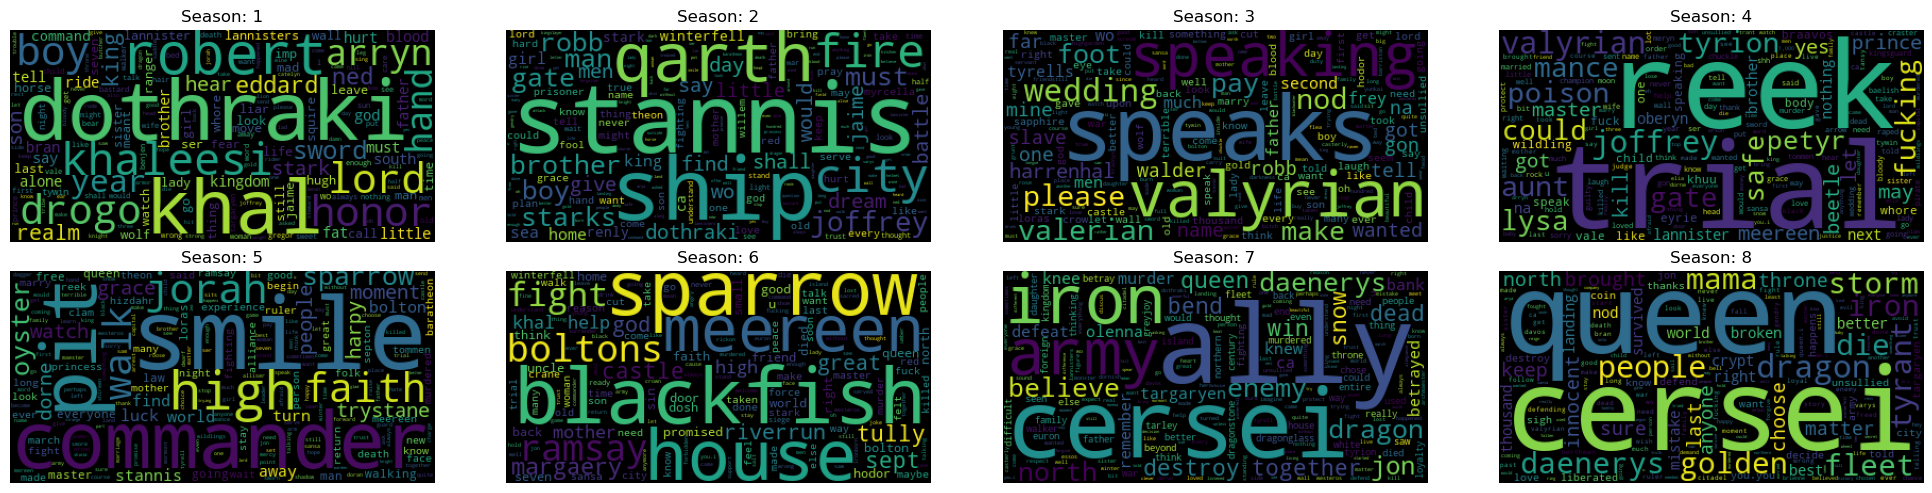

In [30]:
plt.figure(figsize=(20,5))
for i in range(len(tftrList)):
    plt.subplot(241+i)
    WC = WordCloud(collocations=False).generate_from_frequencies(tftrList[i])
    plt.title("Season: "+ str(i+1))
    plt.imshow(WC)
    plt.axis('off')
    
plt.tight_layout() 
plt.show()

    

ModuleNotFoundError: No module named 'community'

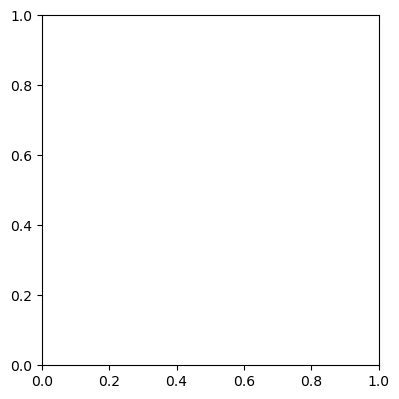

In [34]:

### Creating sub plots for each season. Not used

SeasonNodesList = list()
EdgeList = list()

for i in range(0,8):
    SeasonNodesList.append(set())
    EdgeList.append(list())
    for FROM, TO in G.edges():
        if i+1 in G.edges[FROM,TO]["lines"].keys():
            SeasonNodesList[i].add(FROM)
            SeasonNodesList[i].add(TO)
            EdgeList[i].append((FROM,TO))

FinalSeasonNodesList = [list(x) for x in SeasonNodesList]
EdgeSubGraphs = [G.edge_subgraph(x) for x in EdgeList]
NodeSubGraphs = [G.subgraph(x) for x in FinalSeasonNodesList]
plt.figure(figsize=(20,10))
for i in range(len(NodeSubGraphs)):
    plt.subplot(241+i)
    PlotGrapWithComm(NodeSubGraphs[i], EdgeSubGraphs[i], 50)
    plt.title("Season: "+ str(i+1))
    
plt.tight_layout() 
plt.show()


In [35]:

# FROM https://stackoverflow.com/questions/4576077/how-can-i-split-a-text-into-sentences
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"
multiple_dots = r'\.{2,}'

def split_into_sentences(text: str) -> list[str]:
    """
    Split the text into sentences.

    If the text contains substrings "<prd>" or "<stop>", they would lead 
    to incorrect splitting because they are used as markers for splitting.

    :param text: text to be split into sentences
    :type text: str

    :return: list of sentences
    :rtype: list[str]
    """
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
    text = re.sub(multiple_dots, lambda match: "<prd>" * len(match.group(0)) + "<stop>", text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = [s.strip() for s in sentences]
    if sentences and not sentences[-1]: sentences = sentences[:-1]
    return sentences

In [40]:
SentimentArray = np.array(list())
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

sid_obj = SentimentIntensityAnalyzer()

stop_words = set(stopwords.words('english'))
def sub_graph_sentiment(SubGraph):
    sentimentlist = list()
    dialogueSet = set()
    characterDict = dict()

    for edges in tqdm(SubGraph.edges):
        for key,value in SubGraph.edges[edges]["lines"].items():
            for key1,value1 in value.items():
                for key2,value2 in value1.items():
                    for key3, value3 in value2.items():
                        for line in value3:
                            if edges[0] not in characterDict.keys():
                                characterDict[edges[0]] = list()
                            
                           
                            # concatedString = "".join(value3)
                            concatedString = line

                            if concatedString not in dialogueSet:
                                dialogueSet.add(concatedString)
                            for sentence in split_into_sentences(concatedString):
                                sentiment_dict = sid_obj.polarity_scores(sentence)
                                #sentimentTuple = sentiment(sentence)
                                if sentiment_dict["pos"] > sentiment_dict["neg"]:
                                    characterDict[edges[0]].append(1)
                                    sentimentlist.append(1)
                                elif sentiment_dict["pos"] < sentiment_dict["neg"]:
                                    characterDict[edges[0]].append(-1)
                                    sentimentlist.append(-1)
                                else:
                                    characterDict[edges[0]].append(0)
                                    sentimentlist.append(0)

                                
    

    return sentimentlist, characterDict

ListOfSentiments = [np.array(sub_graph_sentiment(x)[0]) for x in EdgeSubGraphs]

sentimentList, chardDict = sub_graph_sentiment(G)


  1%|▏         | 13/896 [00:00<00:07, 115.46it/s]

100%|██████████| 4262/4262 [00:06<00:00, 677.94it/s] 


In [41]:
from statistics import mean
chardDict.items()
mydict = {k: mean(v) for k, v in chardDict.items() if len(v) > 300}
HappyPersons = sorted(mydict.items(), key=lambda x:x[1], reverse=True)
angryPersons = sorted(mydict.items(), key=lambda x:x[1])
print(HappyPersons[0:10])
print(angryPersons[0:10])

[('margaery tyrell', 0.2590299277605779), ('barristan selmy', 0.2537313432835821), ('edmure tully', 0.2099737532808399), ('hot pie', 0.17884130982367757), ('qyburn', 0.17164179104477612), ('walder frey', 0.16443594646271512), ('podrick payne', 0.1581769436997319), ('high sparrow', 0.14066496163682865), ('aemon', 0.14002205071664828), ('tommen baratheon', 0.1359773371104816)]
[('pypar', -0.31767337807606266), ('sandor clegane', -0.129739336492891), ('grenn', -0.09523809523809523), ('janos slynt', -0.09270516717325228), ('melisandre', -0.09200438116100766), ('ellaria sand', -0.08776595744680851), ('randyll tarly', -0.078125), ('shae', -0.07344632768361582), ('theon greyjoy', -0.0648018648018648), ('grey worm', -0.06317411402157165)]


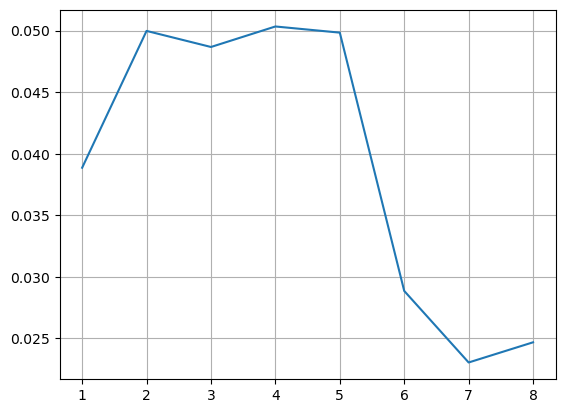

In [42]:
sentimentMeans = [np.mean(x) for x in ListOfSentiments]
sentimentMeans
sns.lineplot(y=sentimentMeans, x = [1,2,3,4,5,6,7,8])
plt.grid()

In [43]:
HouseList = []
for name in mydict.keys():
    if "house" in G.nodes[name].keys():
        HouseList.append(G.nodes[name]["house"][0])
    elif "affiliation" in G.nodes[name].keys():
        HouseList.append(G.nodes[name]["affiliation"][0])
    else:
        HouseList.append("No House")
print(HouseList)

df = pd.DataFrame()

df["Houses"] = HouseList
df["Names"] = mydict.keys()
df["Values"] = mydict.values()
df =df.sort_values(by="Houses")

['House Martell', 'House Baratheon', 'House Targaryen', 'No House', 'House Lannister', 'House Tarly', 'No House', 'No House', 'House Stark', 'House Baratheon', 'No House', 'No House', 'House Frey', 'House Greyjoy', 'House Redwyne', 'House Stark', 'House Baratheon', 'House Mormont', 'House Targaryen', 'No House', 'House Tyrell', 'No House', 'House Baratheon', "Bronn's house", 'No House', 'No House', 'No House', 'House Reed', 'House Royce', 'House Tully', 'House Stark', 'House Mormont', 'House Tyrell', 'House Payne', 'House Seaworth', 'No House', 'No House', 'No House', 'House Thorne', 'House Reed', 'No House', 'No House', 'House Targaryen', 'No House', 'No House', 'Maegyr family', 'House Bolton', 'House Clegane', 'House Baratheon', 'House Tully', 'House Lannister', 'House Greyjoy', 'House Tarly', 'No House', 'No House', 'House Selmy', 'House Greyjoy', 'No House', 'House Bolton', 'House Stark', 'House Slynt', 'House Lannister', 'House Tully', 'House Tarth', 'No House', 'No House', 'House

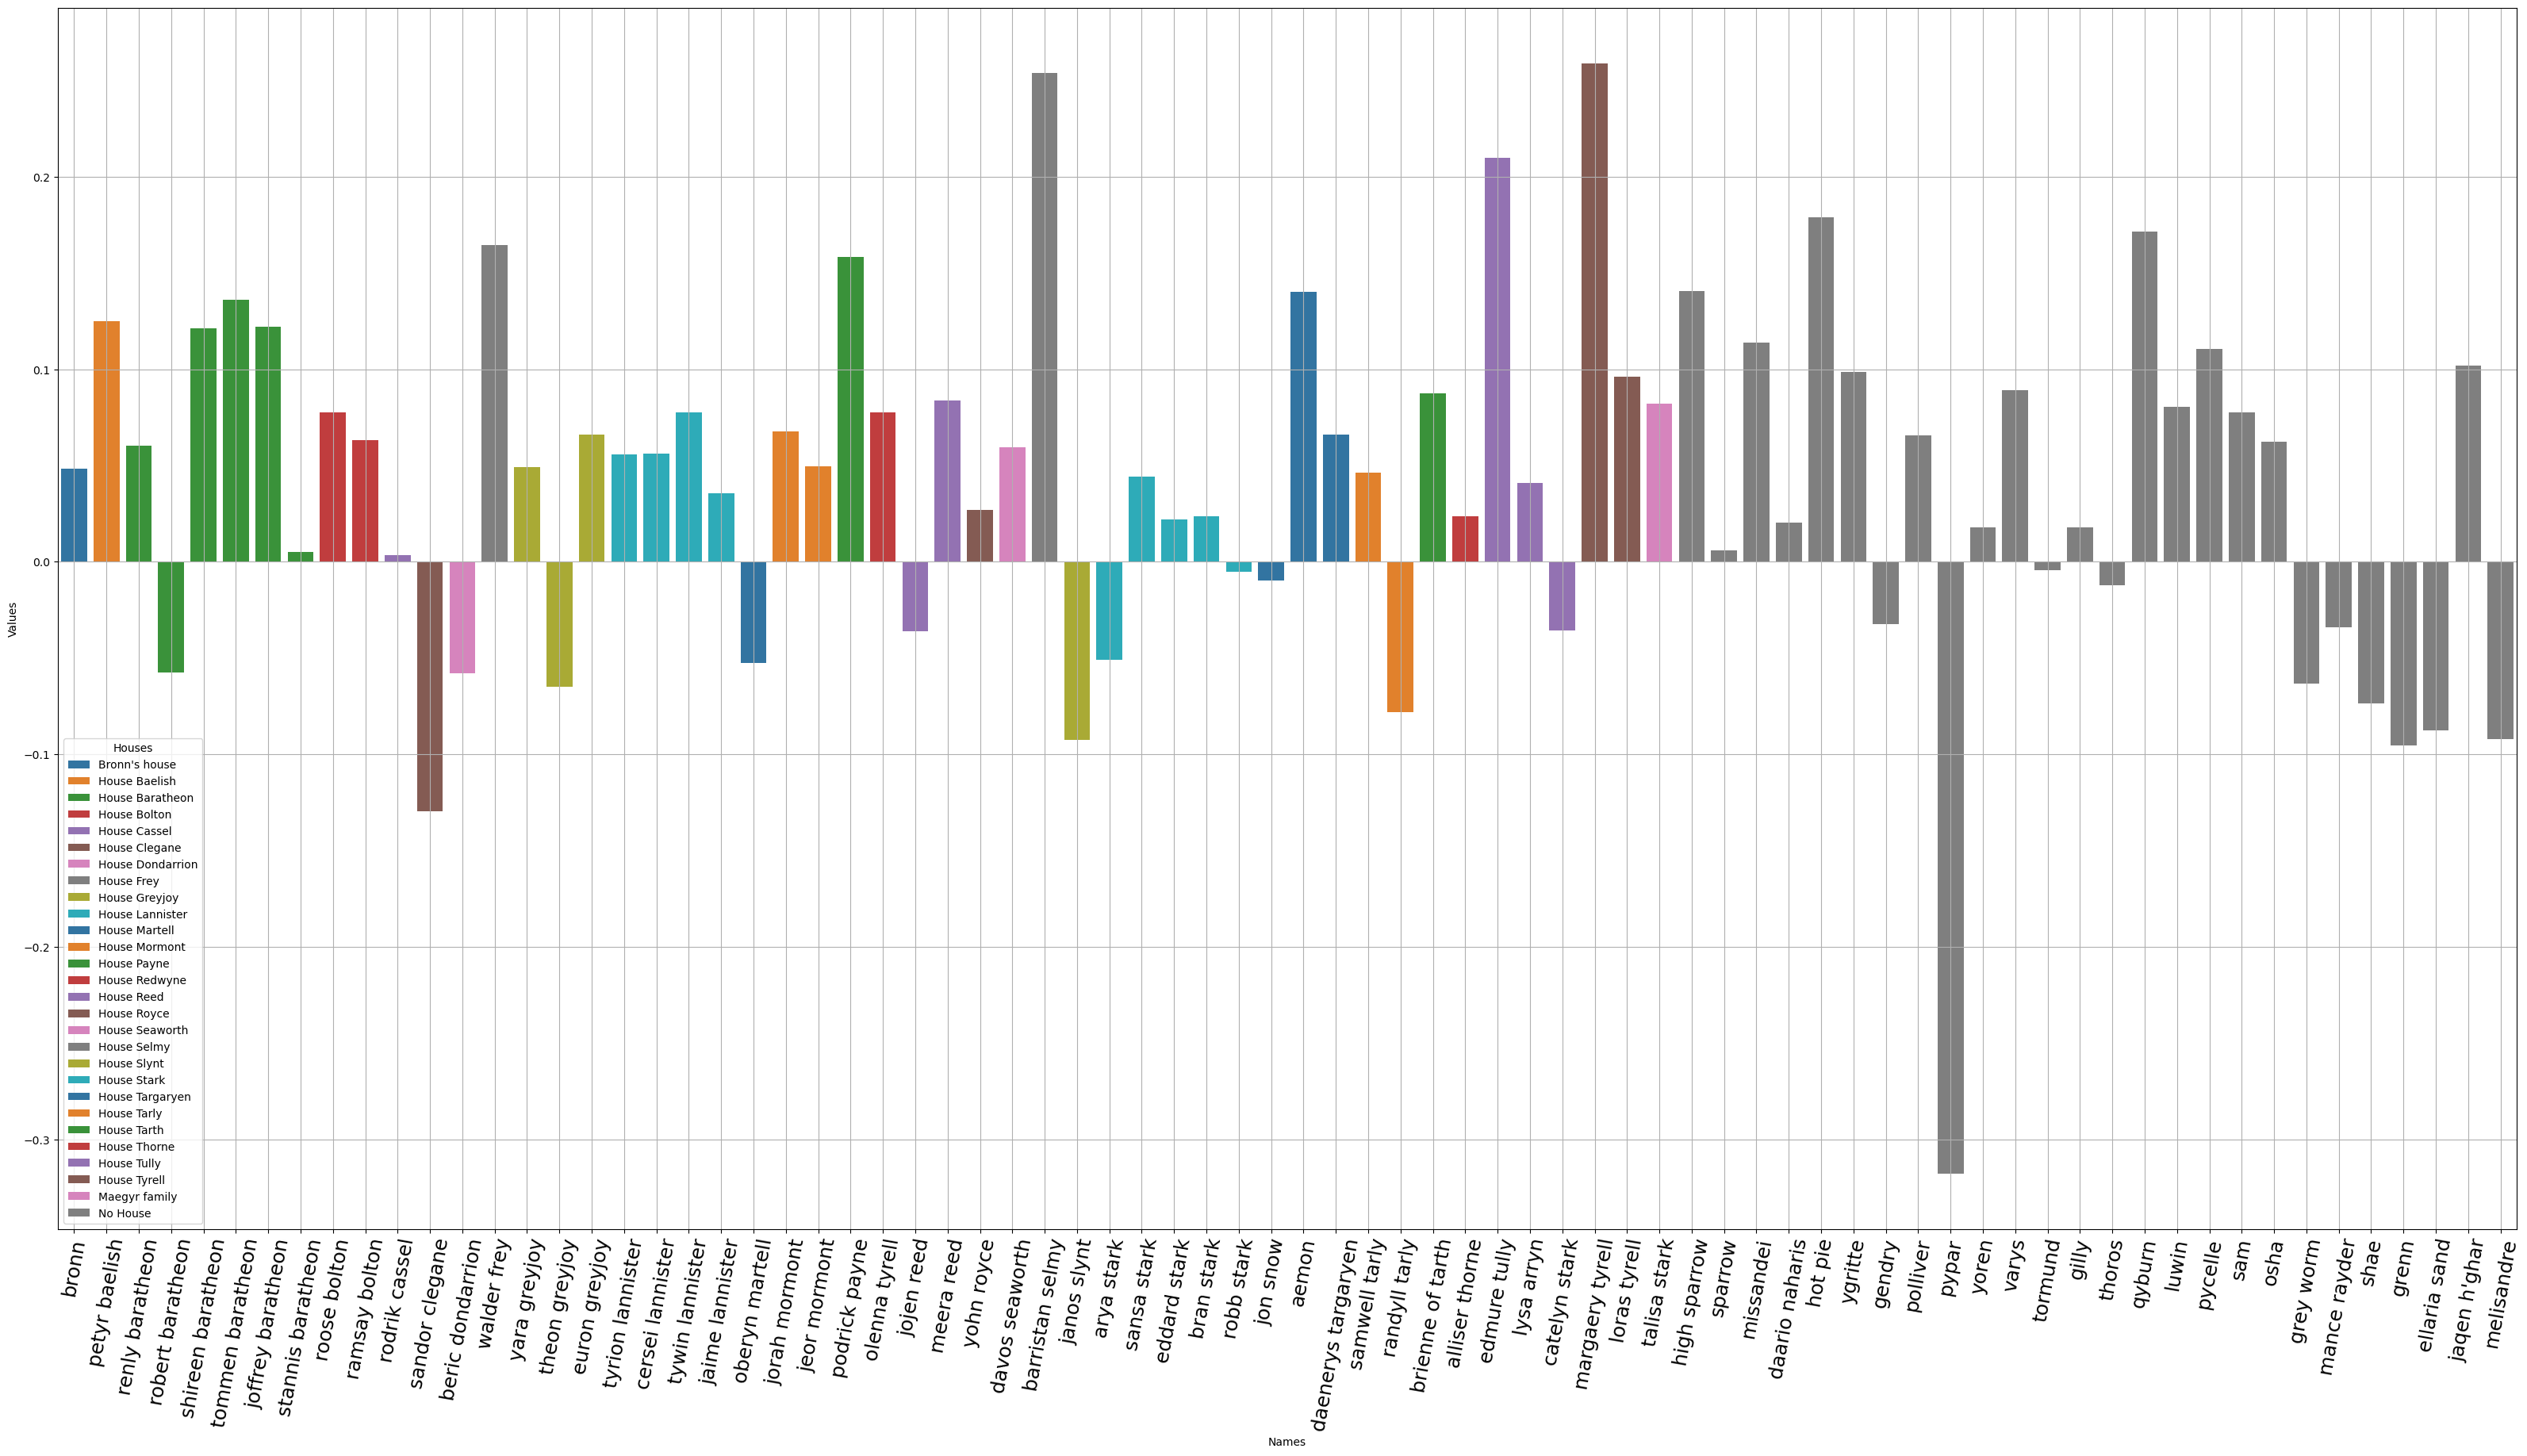

In [44]:
import pandas as pd
plt.figure(figsize=(40,20))
ax = sns.barplot(y = "Values", x= "Names", hue = "Houses",data = df, dodge=False, palette= sns.color_palette())
plt.xticks(rotation = 80, fontsize= 18)
sns.move_legend(ax, loc="best")
plt.grid()
plt.show()

In [45]:
def Lix(listoftext):
    senctenceList = listoftext
    P = len(senctenceList)
    L = 0
    O = 0
    for sentence in senctenceList:
        O += len(sentence.split(" "))
        for word in sentence.split(" "):
            if len(word) > 6:
                L += 1            
    lixNumber = O/P + L*100/O


    return lixNumber

In [46]:

G.out_edges[('cohollo', 'daenerys targaryen')]
textDict = dict()
textSet = set()
for FROM, TO in G.out_edges():
    for season, val in G.out_edges[(FROM,TO)].items():
        if season != "weight":
            for episode, val2 in val.items():
                for epiname,val3 in val2.items():
                    for location, val4 in val3.items():
                        for dialogue in val4.values():
                            for text in dialogue:
                                if text not in textSet:
                                    textSet.add(text)
                                    if FROM not in textDict.keys():
                                        textDict[FROM] = list()
                                    textDict[FROM].append(text)


In [47]:

lixDict = dict()
for key in textDict.keys():
    lixDict[key] = Lix(textDict[key])

In [48]:
HouseList = []
for name in lixDict.keys():
    if "house" in G.nodes[name].keys():
        HouseList.append(G.nodes[name]["house"][0])
    elif "affiliation" in G.nodes[name].keys():
        HouseList.append(G.nodes[name]["affiliation"][0])
    else:
        HouseList.append("No House")
print(HouseList)

df = pd.DataFrame()

df["Houses"] = HouseList
df["Names"] = lixDict.keys()
df["Values"] = lixDict.values()
df =df.sort_values(by="Houses")

['No House', 'No House', 'House Martell', 'House Tarly', 'No House', 'House Baratheon', 'No House', 'No House', 'House Targaryen', 'No House', 'No House', 'House Tyrell', 'House Bracken', 'House Lannister', 'House Lefford', 'No House', 'House Stark', 'House of Qaggaz', 'No House', 'No House', 'No House', 'House Tarly', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'House Stark', 'House Baratheon', 'No House', 'No House', 'House Florent', 'No House', 'House Florent', 'No House', 'No House', 'No House', 'No House', 'No House', 'House Frey', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'No House', 'House Glover', 'House of Eraz', 'No House', 'No House', 'House Mormont', 'House Greyjoy', 'No House', 'House Redwyne', 'No House', 'No House', 'No House', 'No House', 'No House', 'House Lannister of Lannisport', 'House Stark', 'House Baratheon', 'No House', 'House Yarwyck', 'No House', 'No House

In [49]:
Over50DegreeList = [x for x in G.nodes() if G.degree(x) > 50]
Over15DegreeList = [x for x in G.nodes() if G.degree(x) > 15]
df2 = df.loc[df["Names"].isin(Over50DegreeList)]
df3 = df.loc[df["Names"].isin(Over15DegreeList)]

In [108]:
sorted(G.out_edges(), key=lambda n: G.out_edges[n]['weight'], reverse=True)[0:10]
sorted(G.edges(), key=lambda n: G.edges[n]['weight'], reverse=True)[0:10]

[('daenerys targaryen', 'jorah mormont'),
 ('tyrion lannister', 'varys'),
 ('tyrion lannister', 'bronn'),
 ('daenerys targaryen', 'tyrion lannister'),
 ('cersei lannister', 'jaime lannister'),
 ('sam', 'gilly'),
 ('jorah mormont', 'daenerys targaryen'),
 ('jaime lannister', 'brienne of tarth'),
 ('jon snow', 'tormund'),
 ('tyrion lannister', 'jaime lannister')]

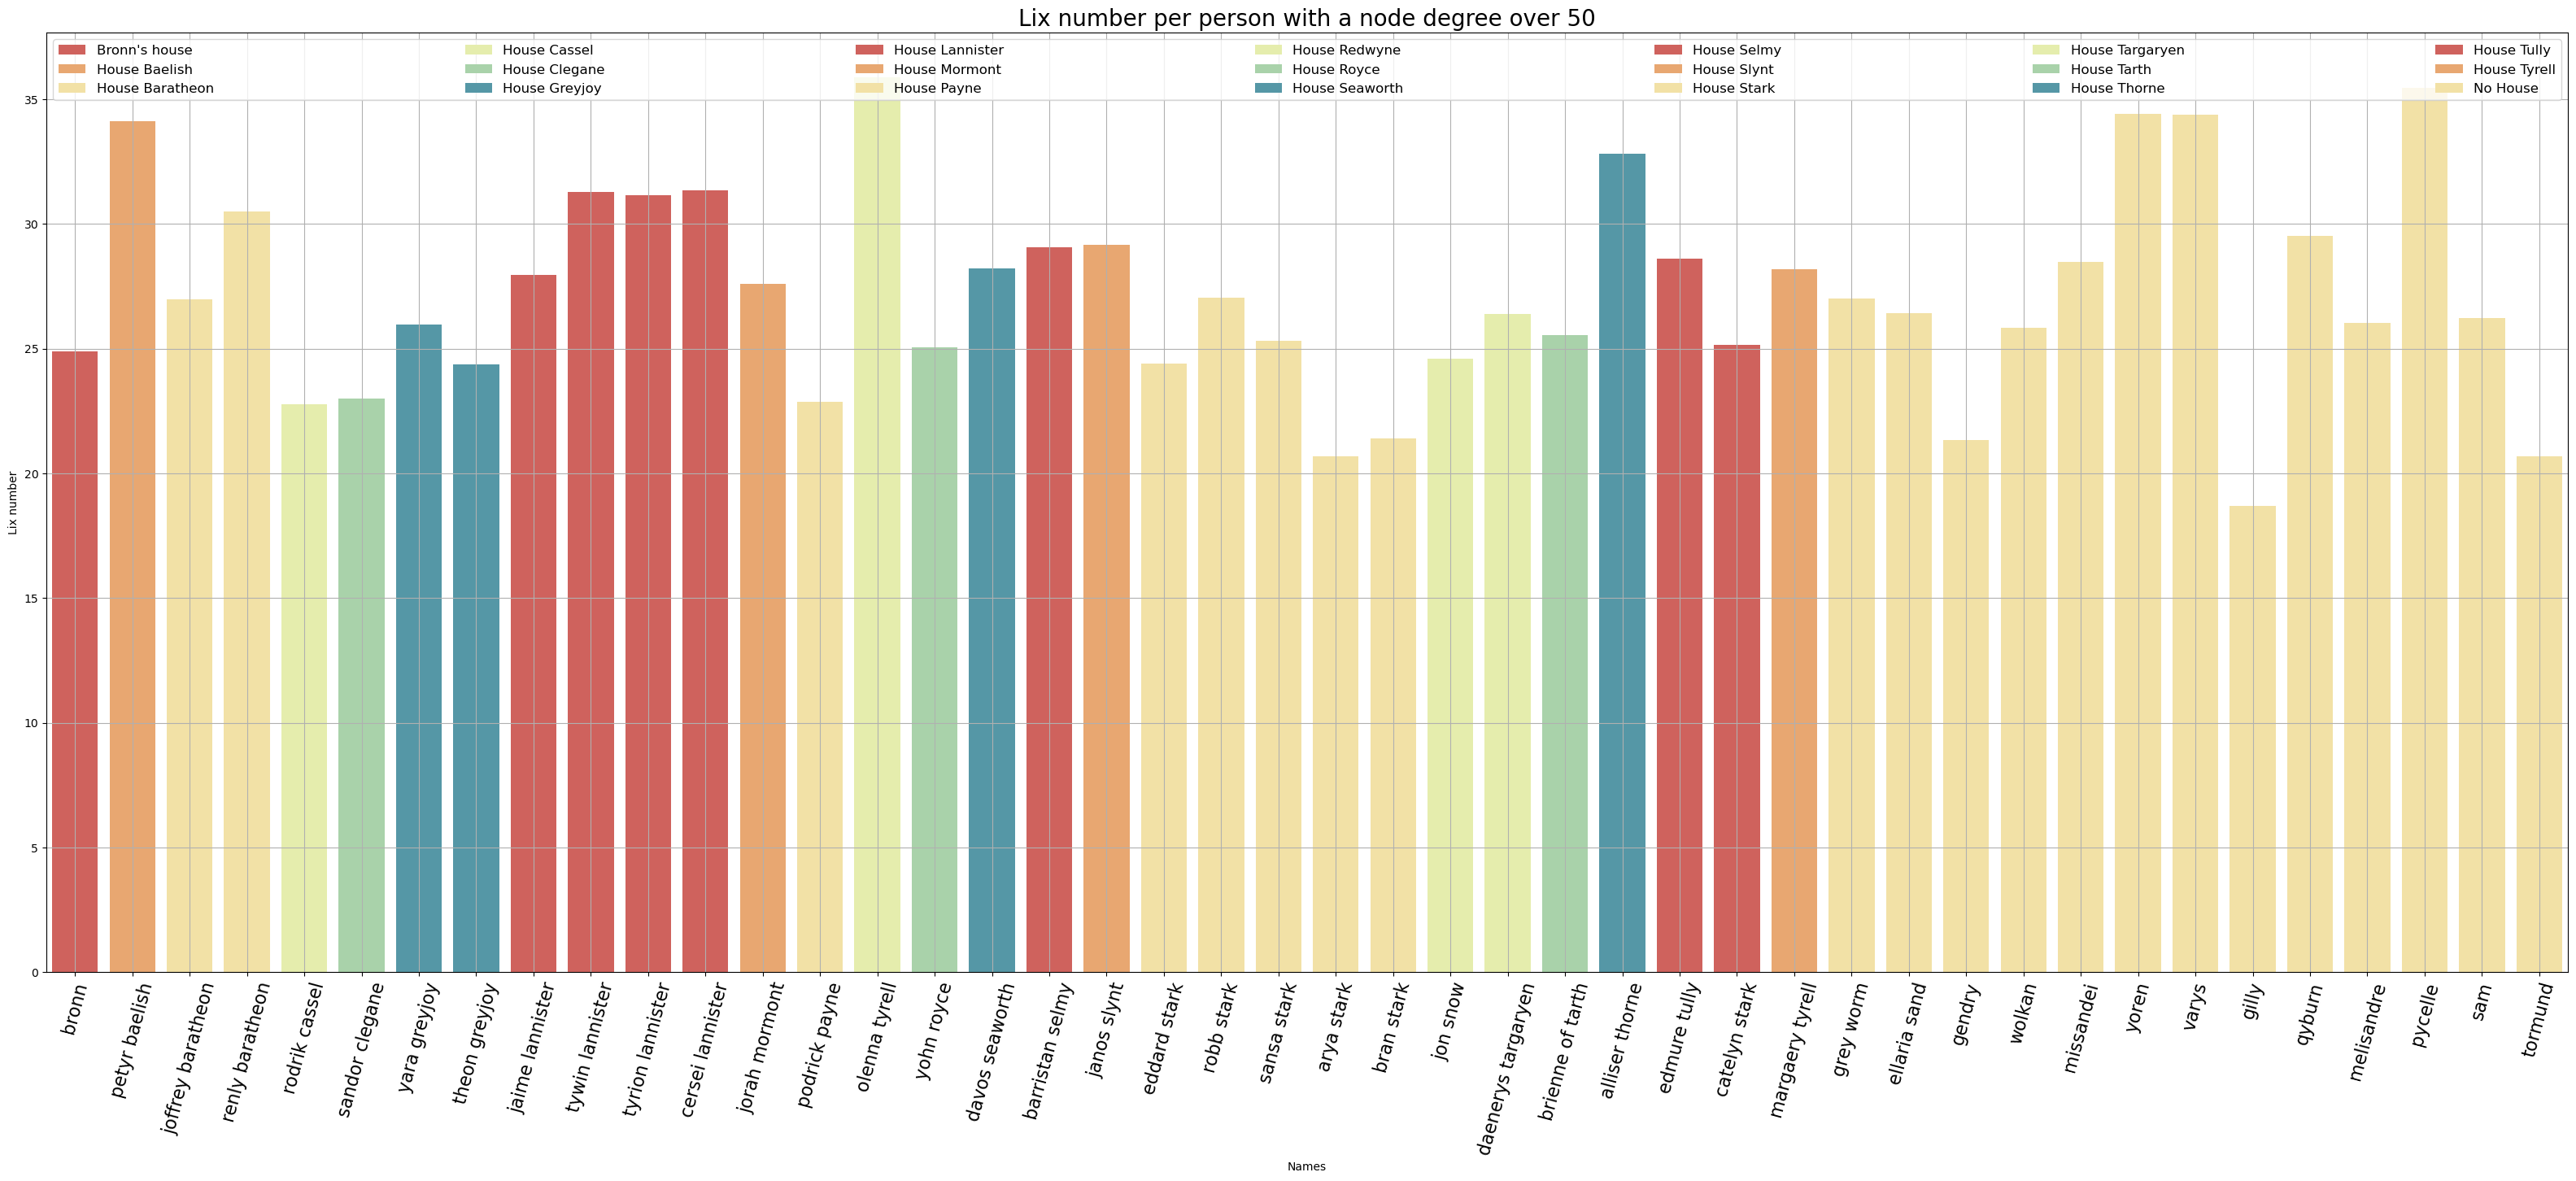

In [51]:
plt.figure(figsize=(40,15))
ax = sns.barplot(y = "Values", x= "Names", hue = "Houses",data = df2, dodge=False, palette= sns.color_palette("Spectral"))
plt.title("Lix number per person with a node degree over 50", fontsize = 20)
plt.ylabel("Lix number")
plt.grid(True,which="major")
sns.move_legend(ax,loc="upper center")
plt.xticks(rotation = 75, fontsize = 16)
plt.legend(mode = "expand",   ncol = 7, fontsize = 12)
plt.show()

In [52]:
LannisterMean = (lixDict["jaime lannister"] + lixDict["tywin lannister"]+ lixDict["tyrion lannister"]+ lixDict["cersei lannister"])/4
lixNumbers = list(lixDict.values())

In [53]:
import random

#Creating a list of of means from randomly chosen lix values
meanList = []
N = 10000
for i in range(N):
    unshuffledList = list(df3["Values"])
    random.shuffle(unshuffledList)
    avg = np.mean(unshuffledList[0:4]) #Taking the mean of randomly chosen lix values 
    meanList.append(avg) 
meanList = np.array(meanList)
print(len(meanList[meanList>LannisterMean])/N *100,"%")

4.26 %
